In [99]:
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support

In [100]:
normTitanicTrainv2 = pd.read_csv('normTitanicTrain.csv')
normTitanicTestv2 = pd.read_csv('normTitanicTest.csv')

TitanicTestY = pd.read_csv('TitanicTestY.csv')
TitanicTrainY = pd.read_csv('TitanicTrainY.csv')

Logistic Regression

In [101]:
 from sklearn.linear_model import LogisticRegression

In [102]:
def perf_measure(y_actual, y_hat):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_hat)): 
        if y_actual[i]==y_hat[i]==1:
           TP += 1
        if y_hat[i]==1 and y_actual[i]!=y_hat[i]:
           FP += 1
        if y_actual[i]==y_hat[i]==0:
           TN += 1
        if y_hat[i]==0 and y_actual[i]!=y_hat[i]:
           FN += 1

    return(TP, FP, TN, FN)

In [103]:
logis = LogisticRegression(solver='saga', max_iter=40000)

In [104]:
logis.fit(normTitanicTrainv2,TitanicTrainY)

/home/gebruiker/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=40000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [105]:
predict = logis.predict(normTitanicTestv2)

In [106]:
accLogisticRegression = accuracy_score(TitanicTestY, predict)

In [107]:
accLogisticRegression

0.9040767386091128

RandomForestClassifier

In [108]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [109]:
clf = RandomForestClassifier(max_depth=200, random_state=42)

In [110]:
clf.fit(normTitanicTrainv2, TitanicTrainY)

/home/gebruiker/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=200, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [111]:
print(clf.feature_importances_)

[0.050377   0.11565888 0.02730252 0.01525561 0.11483551 0.04475827
 0.02027051 0.15945415 0.06772686 0.10882887 0.00945648 0.00702801
 0.01074562 0.0415966  0.00945593 0.02295931 0.07810625 0.01777406
 0.00525726 0.0079973  0.00612013 0.01231936 0.00830604 0.00871835
 0.01155828 0.01054737 0.00758546]


In [112]:
predictRandomForest = clf.predict(normTitanicTestv2)

In [113]:
accRandomForestClassifier = accuracy_score(TitanicTestY, predictRandomForest)

In [114]:
accRandomForestClassifier

0.8369304556354916

ExtraTreesClassifier

In [115]:
from sklearn.ensemble import ExtraTreesClassifier

In [116]:
clf2 = ExtraTreesClassifier(n_estimators=10000, random_state=0)

In [117]:
clf2.fit(normTitanicTrainv2, TitanicTrainY)

/home/gebruiker/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=10000,
                     n_jobs=None, oob_score=False, random_state=0, verbose=0,
                     warm_start=False)

In [118]:
predictExtraTrees = clf2.predict(normTitanicTestv2)

In [119]:
accExtraTreesClassifier = accuracy_score(TitanicTestY, predictExtraTrees)

In [120]:
accExtraTreesClassifier

0.7889688249400479

DecisionTreeClassifier

In [121]:
from sklearn.tree import DecisionTreeClassifier

In [122]:
clf3 = DecisionTreeClassifier(random_state=0)

In [123]:
clf3.fit(normTitanicTrainv2, TitanicTrainY)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [124]:
predictTree = clf3.predict(normTitanicTestv2)

In [125]:
accDecisionTreeClassifier = accuracy_score(TitanicTestY, predictTree)

In [126]:
accDecisionTreeClassifier

0.7434052757793765

In [127]:
from sklearn.cluster import KMeans

In [128]:
#kmeans = KMeans(n_clusters=2, random_state=0).fit(normTitanicTrainv2.to_numpy())

In [129]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(normTitanicTrainv2)

In [130]:
Centrt = kmeans.cluster_centers_

In [131]:
Centrt

array([[ 0.09146165,  0.19486892, -0.25566004, -0.29104238, -0.1783032 ,
        -0.09518497, -0.00529004,  0.08097676, -0.74349692,  0.74349692,
        -0.09245356, -0.0776966 ,  0.13421402, -0.3272369 , -0.22108416,
        -0.50262469,  0.77794419, -0.42215853,  0.10442034, -0.27088081,
         0.0017127 ,  0.06870294,  0.09080665,  0.15585926,  0.10933086,
        -0.10428605, -0.1268398 ],
       [-0.09266856, -0.30485845,  0.43581043,  0.4210176 ,  0.21124167,
         0.16211311, -0.05362652, -0.04326477,  1.08320675, -1.08320675,
         0.02720034,  0.05982509, -0.07081335,  0.51677286,  0.30752293,
         0.78164673, -1.14285483,  0.55739037, -0.09374424,  0.45552427,
         0.04119362, -0.14344832, -0.15427435, -0.29012032, -0.12461535,
         0.17252178,  0.22156223]])

In [132]:
predictKMeans = clf2.predict(normTitanicTestv2)

In [133]:
accKMeans = accuracy_score(TitanicTestY, predictKMeans)

In [134]:
accKMeans

0.7889688249400479

In [135]:
from sklearn.svm import SVC, LinearSVC

In [136]:
model = SVC()
model.fit(normTitanicTrainv2,TitanicTrainY)
prediction_svm=model.predict(normTitanicTestv2)

/home/gebruiker/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [137]:
accSVM = accuracy_score(TitanicTestY, prediction_svm)

In [138]:
cm=confusion_matrix(TitanicTestY, prediction_svm)
cm

array([[247,  18],
       [  8, 144]])

In [139]:
precision_recall_fscore_support(TitanicTestY, prediction_svm,  average='weighted')

(0.9395620758295326, 0.9376498800959233, 0.9380431960164353, None)

In [140]:
from sklearn.linear_model import LinearRegression

In [141]:
reg = LinearRegression().fit(normTitanicTrainv2,TitanicTrainY)

In [142]:
predictLinearReg = reg.predict(normTitanicTestv2)

In [143]:
accLinearReg = reg.score(normTitanicTestv2,TitanicTestY)

In [144]:
import pickle

In [145]:
pickle.dump(kmeans, open("kMeanModdelTitanic.pkl", "wb"))

In [146]:
from sklearn.neighbors import KNeighborsClassifier

In [147]:
model = KNeighborsClassifier(n_neighbors = 4)

In [148]:
model.fit(normTitanicTrainv2,TitanicTrainY)

/home/gebruiker/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [149]:
prediction_knn=model.predict(normTitanicTestv2)

In [150]:
accKnn = accuracy_score(TitanicTestY, prediction_knn)

In [151]:
accKnn

0.8609112709832134

In [152]:
from sklearn.naive_bayes import GaussianNB
model= GaussianNB()
model.fit(normTitanicTrainv2,TitanicTrainY)
prediction_gnb=model.predict(normTitanicTestv2)
accgnb = accuracy_score(TitanicTestY, prediction_gnb)

/home/gebruiker/anaconda3/lib/python3.7/site-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [153]:
accgnb

0.9016786570743405

In [154]:
from sklearn.ensemble import AdaBoostClassifier
model= AdaBoostClassifier()
model.fit(normTitanicTrainv2,TitanicTrainY)
prediction_adb=model.predict(normTitanicTestv2)
accadb = accuracy_score(TitanicTestY, prediction_adb)

/home/gebruiker/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [155]:
accadb

0.8800959232613909

Linear Discriminant Analysis

In [156]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model= LinearDiscriminantAnalysis()
model.fit(normTitanicTrainv2,TitanicTrainY)
prediction_lda=model.predict(normTitanicTestv2)
accalda = accuracy_score(TitanicTestY, prediction_lda)

/home/gebruiker/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [157]:
accalda

0.935251798561151

In [158]:
from sklearn.ensemble import GradientBoostingClassifier
model= GradientBoostingClassifier()
model.fit(normTitanicTrainv2,TitanicTrainY)
prediction_gbc=model.predict(normTitanicTestv2)
accagbc = accuracy_score(TitanicTestY, prediction_gbc)

/home/gebruiker/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [159]:
accagbc

0.8705035971223022

In [160]:
print(accLogisticRegression)
print(accRandomForestClassifier)
print(accExtraTreesClassifier)
print(accDecisionTreeClassifier)
print(accKMeans)
print(accLinearReg)
print(accSVM)
print(accKnn)
print(accgnb)
print(accadb)
print(accalda)
print(accagbc)

0.9040767386091128
0.8369304556354916
0.7889688249400479
0.7434052757793765
0.7889688249400479
0.6389417598468804
0.9376498800959233
0.8609112709832134
0.9016786570743405
0.8800959232613909
0.935251798561151
0.8705035971223022


In [161]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'AdaBoostClassifier', 
              'Gradient Decent', 'Linear Discriminant Analysis', 
              'Decision Tree'],
    'Score': [accSVM, accKnn, accLogisticRegression, 
              accRandomForestClassifier, accgnb, accadb, 
              accagbc, accalda, accDecisionTreeClassifier]})
models.sort_values(by='Score',ascending=False)

,Model,Score
0,Support Vector Machines,0.937650
7,Linear Discriminant Analysis,0.935252
2,Logistic Regression,0.904077
4,Naive Bayes,0.901679
5,AdaBoostClassifier,0.880096
6,Gradient Decent,0.870504
1,KNN,0.860911
3,Random Forest,0.836930
8,Decision Tree,0.743405


In [162]:
from sklearn.cluster import KMeans

In [163]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(normTitanicTrainv2)
predict = kmeans.predict(normTitanicTestv2)
accKmeanK2 = accuracy_score(TitanicTestY, predict)
accKmeanK2

0.03117505995203837

In [164]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(normTitanicTrainv2)

In [165]:
Centrt = kmeans.cluster_centers_

In [166]:
Centrt

array([[ 0.09146165,  0.19486892, -0.25566004, -0.29104238, -0.1783032 ,
        -0.09518497, -0.00529004,  0.08097676, -0.74349692,  0.74349692,
        -0.09245356, -0.0776966 ,  0.13421402, -0.3272369 , -0.22108416,
        -0.50262469,  0.77794419, -0.42215853,  0.10442034, -0.27088081,
         0.0017127 ,  0.06870294,  0.09080665,  0.15585926,  0.10933086,
        -0.10428605, -0.1268398 ],
       [-0.09266856, -0.30485845,  0.43581043,  0.4210176 ,  0.21124167,
         0.16211311, -0.05362652, -0.04326477,  1.08320675, -1.08320675,
         0.02720034,  0.05982509, -0.07081335,  0.51677286,  0.30752293,
         0.78164673, -1.14285483,  0.55739037, -0.09374424,  0.45552427,
         0.04119362, -0.14344832, -0.15427435, -0.29012032, -0.12461535,
         0.17252178,  0.22156223]])

In [167]:
predict = kmeans.predict(normTitanicTestv2)

In [168]:
cm=confusion_matrix(TitanicTestY, predict)
cm

array([[243,  22],
       [  0, 152]])

In [169]:
#precision_recall_fscore_support(TitanicTestY, predict,  average='samples')

In [170]:
cm

array([[243,  22],
       [  0, 152]])

In [171]:
#perf_measure(TitanicTestY, predict)

In [172]:
precision_recall_fscore_support(TitanicTestY, predict, average='macro')

(0.9367816091954023, 0.9584905660377359, 0.9446041254045698, None)

In [173]:
precision_recall_fscore_support(TitanicTestY, predict, average='micro')

(0.947242206235012, 0.947242206235012, 0.947242206235012, None)

In [174]:
precision_recall_fscore_support(TitanicTestY, predict,  average='weighted')

(0.9539127318834588, 0.947242206235012, 0.9478799840181958, None)

In [175]:
precision_recall_fscore_support(TitanicTestY, predict,  average='binary')

(0.8735632183908046, 1.0, 0.9325153374233129, None)

In [176]:
precision_recall_fscore_support(TitanicTestY, predict)

(array([1.        , 0.87356322]),
 array([0.91698113, 1.        ]),
 array([0.95669291, 0.93251534]),
 array([265, 152]))

In [177]:
cm=confusion_matrix(TitanicTestY, predict)
print(cm)
precision_recall_fscore_support(TitanicTestY, predict,  average='weighted')

[[243  22]
 [  0 152]]


(0.9539127318834588, 0.947242206235012, 0.9478799840181958, None)

In [178]:
accKmeanK2 = accuracy_score(TitanicTestY, predict)

In [179]:
accKmeanK2

0.947242206235012

In [180]:
KmeanRezult = []
for i in range(1,20):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(normTitanicTrainv2)
    predict = kmeans.predict(normTitanicTestv2)
    accKmeanK2 = accuracy_score(TitanicTestY, predict)
    KmeanRezult.append(accKmeanK2)

In [181]:
KmeanRezult

[0.6354916067146283,
 0.947242206235012,
 0.03117505995203837,
 0.7002398081534772,
 0.03117505995203837,
 0.0,
 0.3069544364508393,
 0.15587529976019185,
 0.014388489208633094,
 0.0,
 0.0,
 0.0,
 0.0,
 0.27577937649880097,
 0.0671462829736211,
 0.0,
 0.15587529976019185,
 0.11270983213429256,
 0.09352517985611511]

In [182]:
KmeanRezult = []
for i in range(1,20):
    kmeans = KMeans(n_clusters= i , random_state=0).fit(normTitanicTrainv2)
    predict = kmeans.predict(normTitanicTestv2)
    accKmeanK2 = accuracy_score(TitanicTestY, predict)
    KmeanRezult.append(accKmeanK2)

In [183]:
KmeanRezult

[0.6354916067146283,
 0.947242206235012,
 0.03117505995203837,
 0.7002398081534772,
 0.03117505995203837,
 0.0,
 0.3069544364508393,
 0.15587529976019185,
 0.014388489208633094,
 0.0,
 0.0,
 0.0,
 0.0,
 0.27577937649880097,
 0.0671462829736211,
 0.0,
 0.15587529976019185,
 0.11270983213429256,
 0.09352517985611511]

In [184]:
import matplotlib.pyplot as plt

In [185]:
import numpy as np

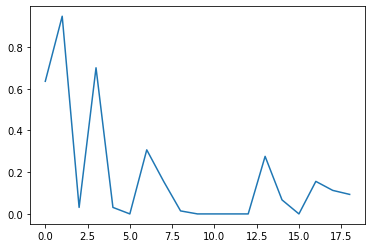

In [186]:
plt.plot(KmeanRezult)

In [187]:
t = np.arange(1, 20, 1)

In [188]:
t

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])

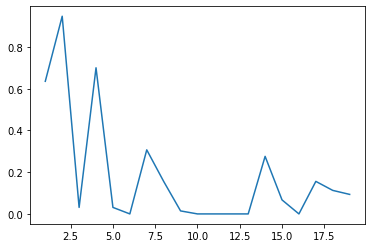

In [189]:
plt.plot(t,KmeanRezult)

In [190]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(normTitanicTrainv2)
    distortions.append(kmeanModel.inertia_)

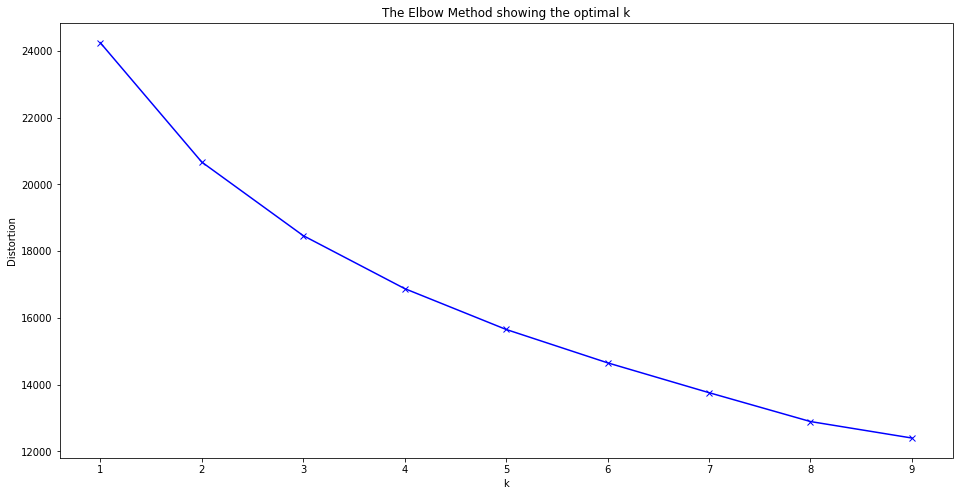

In [191]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [192]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(normTitanicTrainv2)
predict = kmeans.predict(normTitanicTestv2)
accKmeanK2 = accuracy_score(TitanicTestY, predict)
accKmeanK2

0.03117505995203837

In [200]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(normTitanicTrainv2)
predict = kmeans.predict(normTitanicTestv2)
accKmean = accuracy_score(TitanicTestY, predict)
accKmean

0.947242206235012

Plot Percision recall and f1 score of the best model Kmeans

In [201]:
precision_recall_fscore_support(TitanicTestY, predict,  average='weighted')



(0.9539127318834588, 0.947242206235012, 0.9478799840181958, None)

In [202]:
cm=confusion_matrix(TitanicTestY, predict)
cm

array([[243,  22],
       [  0, 152]])